In [17]:
from random import randint
from lib import sum_singlethread, sum_multithread_2_threads, sum_multithread_n_threads, get_duration
from matplotlib import pyplot as plt
from time import time
from IPython.display import clear_output
from sklearn.linear_model import RANSACRegressor
from numpy import argmin, reshape

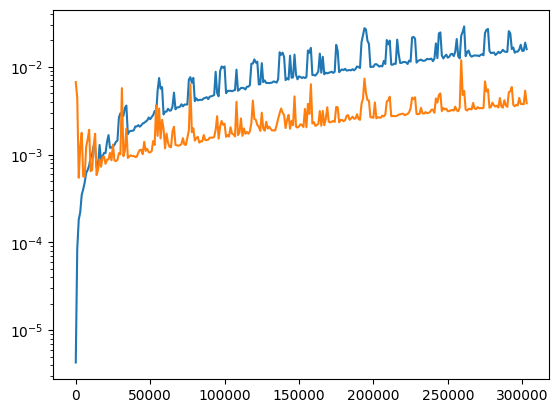

KeyboardInterrupt: 

In [26]:
len_list = list(range(1, int(1e7), 1000))
y_single = []
y_multi = []
for len_ in len_list:
  list_ = [randint(0, 100) for _ in range(len_)]
  start = time()
  sum_multithread_2_threads(list_)
  y_multi.append(get_duration(start))
  start = time()
  sum_singlethread(list_)
  y_single.append(get_duration(start))
  clear_output()
  reg = RANSACRegressor()
  slice_ = len_list[:len(y_single)]
  plt.plot(slice_, y_single)
  plt.plot(slice_, y_multi)
  plt.yscale("log")
  plt.show()

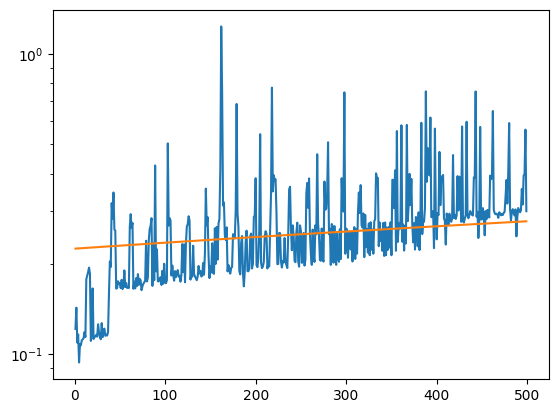

In [31]:
len_ = int(1e7)
list_ = [randint(0, 100) for _ in range(len_)]
x = list(range(1, 500))
y = []
for i in x:
  start = time()
  sum_multithread_n_threads(list_, i)
  y.append(get_duration(start))
  clear_output()
  reg = RANSACRegressor(min_samples=1)
  slice_ = x[:len(y)]
  reg.fit(reshape(slice_, (-1, 1)), y)
  plt.plot(slice_, y)
  plt.plot(slice_, reg.predict(reshape(slice_, (-1, 1))))
  plt.yscale("log")
  plt.show()

In [39]:
line = reg.predict(reshape(x, (-1, 1)))
(line[-1] - line[0]) / len(line)

0.00010511481132617609